In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Load data
data = pd.read_csv('../input/ecommerce-customers/Ecommerce Customers.csv')
data.head(2)


# TODO 1: EDA

In [ ]:
# Check info of data
# --> Có 500 quan sát, không có missing value
data.info() 

In [ ]:
for i in data.columns:
    print(i, data[i].nunique())
    # --> các trường (trừ 'Avatar') có giá trị khác nhau

In [ ]:
data.describe()

In [ ]:
# Distribution
fig, axs = plt.subplots(1,5, figsize=(20, 3))
for i, z in enumerate(['Time on App', 'Avg. Session Length', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']):
    data[z].hist(ax = axs[i], color = 'navy')
    axs[i].set_xlabel(z)

In [ ]:
#Correlation
correl = data.corr(method='pearson')
correl.style.background_gradient(cmap='coolwarm')

In [ ]:
data1 = data.copy()
data1['classified_session length'] = data1['Avg. Session Length']> 33.082008

In [ ]:
from scipy import stats
print(stats.linregress(data1['Avg. Session Length'],data1['Time on Website']))

In [ ]:
sns.lmplot(x= 'Avg. Session Length', y= 'Time on App', fit_reg = True, data = data1)
sns.lmplot(x= 'Avg. Session Length', y= 'Time on Website', fit_reg = True, data = data1)
sns.lmplot(x= 'Time on App', y= 'Time on Website', hue = 'classified_session length' ,fit_reg = True, data = data1)

In [ ]:
## Có mối liên hệ tuyen tinh nào giữa Avg. Session Length với Time on App + Time on Website? --> Không

In [ ]:
sns.lmplot(x = 'Time on App', y = 'Yearly Amount Spent', data = data1)
sns.lmplot(x = 'Avg. Session Length', y = 'Yearly Amount Spent', data = data1)
sns.lmplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = data1)
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = data1)

> Có mối tương quan tuyến tính giữa Yearly Amount Spent với Time on App, Avg. Session Length và đặc biệt là Length of Membership. 

> Khi áp dụng mô hình Linear regression ta sẽ áp dụng với các biến x là Time on App, Avg. Session Length, Length of Membership và y là Yearly Amount Spent.

# TODO 2: LINEAR REGRESSIONS

In [ ]:
# Data processing, sử dụng các biến x là 'Time on App', 'Avg. Session Length', 'Length of Membership'
y = data1['Yearly Amount Spent']
x = data1[['Time on App', 'Avg. Session Length', 'Length of Membership']]

In [ ]:
# Split data
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=30)
# Modeling
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
coef=pd.DataFrame([X_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

In [ ]:
#Evaluation
ytest_pred = reg.predict(X_test)
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

Kết quả test lần 1, với X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
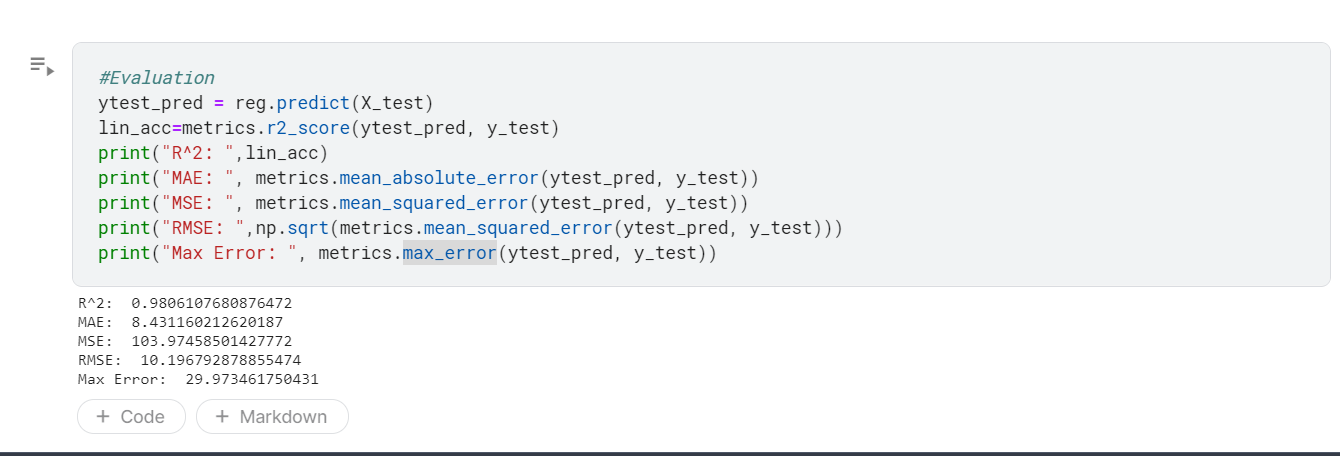

Kết quả test lần 2, với X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=30)
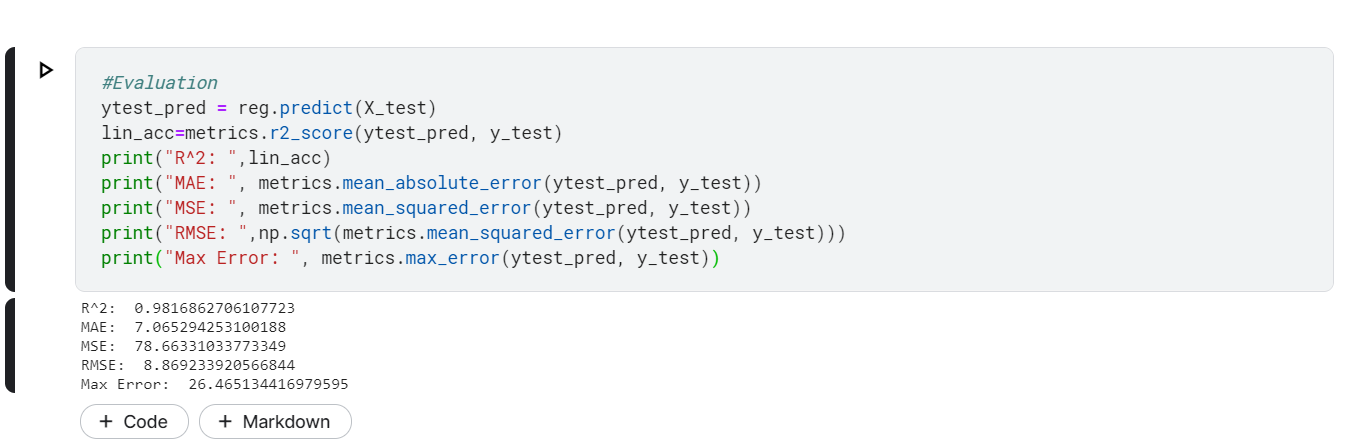

In [ ]:
# Data processing, sử dụng chỉ một biến x là'Length of Membership'
y = data1['Yearly Amount Spent']
x = data1['Length of Membership']
x = np.array(x).reshape(-1,1)
# Split data
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=30)

In [ ]:
# Modeling
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
#Evaluation
ytest_pred = reg.predict(X_test)
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

Kết quả nếu chỉ sử dụng một biến X 'Length of Membership'
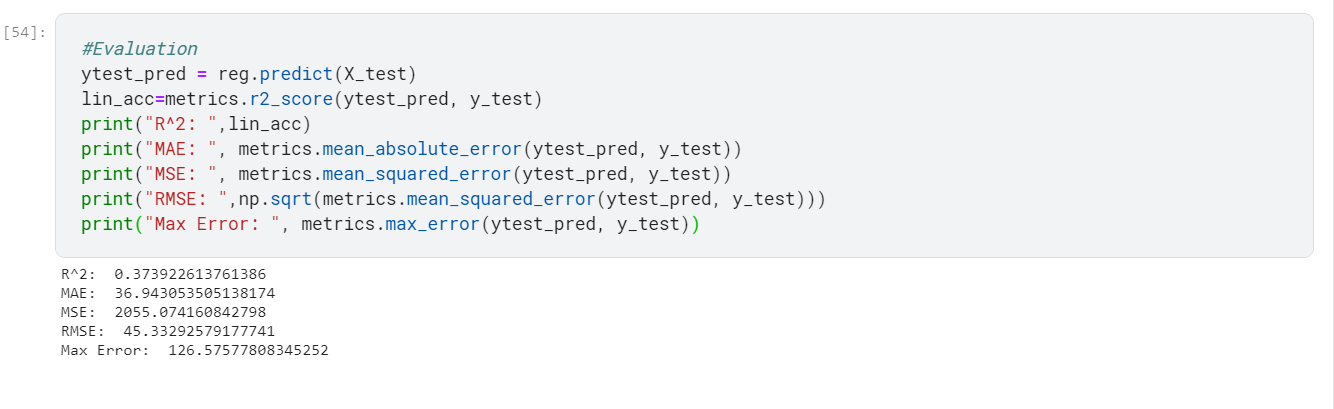

# TODO 3: CUSTOMER CLUSTERING

In [ ]:
data2 = data.copy()

In [ ]:
kmeans = KMeans(n_clusters=4)
data2["Cluster"] = kmeans.fit_predict(data2[['Time on App', 'Time on Website','Avg. Session Length', 'Length of Membership','Yearly Amount Spent']])
data2["Cluster"] = data2["Cluster"].astype("category")

data2.head(2)

In [ ]:
for i in data2['Cluster'].unique():
    print('Cluster', i, data2[data2['Cluster'] == i].describe(), '\n' )

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = data2, x = 'Time on App', hue = 'Cluster', ax = axs[0,0])
sns.kdeplot(data = data2, x = 'Time on Website', hue = 'Cluster', ax = axs[1,0])
sns.kdeplot(data = data2, x = 'Length of Membership', hue = 'Cluster', ax = axs[0,1])
sns.kdeplot(data = data2, x = 'Avg. Session Length', hue = 'Cluster', ax = axs[1,1])

In [ ]:
sns.swarmplot(x= data2['Cluster'], y = data2['Length of Membership'])

In [ ]:
sns.swarmplot(x= data2['Cluster'], y = data2['Time on App'])

In [ ]:
sns.relplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = data2, hue = 'Cluster')
sns.relplot(x = 'Time on App', y = 'Avg. Session Length', data = data2, hue = 'Cluster')
sns.relplot(x = 'Time on App', y = 'Time on Website', data = data2, hue = 'Cluster')
sns.relplot(x = 'Length of Membership', y = 'Time on App', data = data2, hue = 'Cluster')
sns.relplot(x = 'Time on Website', y = 'Avg. Session Length', data = data2, hue = 'Cluster')
sns.relplot(x = 'Length of Membership', y = 'Time on Website', data = data2, hue = 'Cluster')
sns.relplot(x = 'Length of Membership', y = 'Avg. Session Length', data = data2, hue = 'Cluster')

In [ ]:
sns.lmplot(x = 'Yearly Amount Spent', y = 'Time on Website', hue = 'Cluster', data = data2)
sns.lmplot(x = 'Yearly Amount Spent', y = 'Time on App', hue = 'Cluster', data = data2)
sns.lmplot(x = 'Yearly Amount Spent', y = 'Avg. Session Length', hue = 'Cluster', data = data2)

# Bình luận:
1. Chia khách hàng theo thời gian làm thành viên thành 4 nhóm với Yearly Amount Spent tăng dần là: 2(ngắn hạn),0(trung hạn),1(dài hạn),3(lâu năm)
+ Có thể kết luận là thời gian dùng càng lâu thì Yearly Amount Spent càng tăng 

--> Cần tập trung vào việc kéo các khách hàng từ nhóm 2(ngắn hạn) trở thành nhóm 0, và giữ các khách hàng nhóm 0(trung hạn),1(dài hạn),3(lâu năm). 

2. Xem xét hành vi người dùng của 4 nhóm:
+ Nhóm trung - dài hạn, lâu năm có thời gian sử dụng trên WEBSITE không dài hơn nhưng lại có thời gian sử dụng trên APP cao hơn so với nhóm ngắn hạn. Cứ trung bình 1 phút tăng thời gian sử dụng của người dùng trên APP là tăng doanh thu. Tương tự cũng có nhận xét là tăng Avg. Session Length là sẽ Yearly Amount Spent. 

--> Tìm hiểu nguyên nhân tại sao thời gian sử dụng trên web lại giảm đối với người dùng đã lâu, có phải là do đã san bớt vào thời gian dùng app nhiều hơn?

--> Có phải chăng tập trung vào phát triển app sẽ làm đánh mất khách hàng mới?